Dataset Shape: (50, 16)

Column Names:
['patient_id', 'age', 'tumor_size', 'lymph_nodes', 'grade', 'stage', 'er_status', 'pr_status', 'her2_status', 'menopause_status', 'family_history', 'bmi', 'smoking_history', 'alcohol_consumption', 'physical_activity', 'diagnosis']

First 5 rows:
   patient_id  age  tumor_size  lymph_nodes  grade  stage  er_status  \
0        1001   45         2.1            0      2      1          1   
1        1002   52         3.4            2      3      2          1   
2        1003   38         1.8            0      1      1          1   
3        1004   61         4.2            5      3      3          0   
4        1005   29         1.5            0      1      1          1   

   pr_status  her2_status  menopause_status  family_history   bmi  \
0          1            0                 0               0  24.5   
1          0            1                 1               1  28.3   
2          1            0                 0               0  22.1   
3     

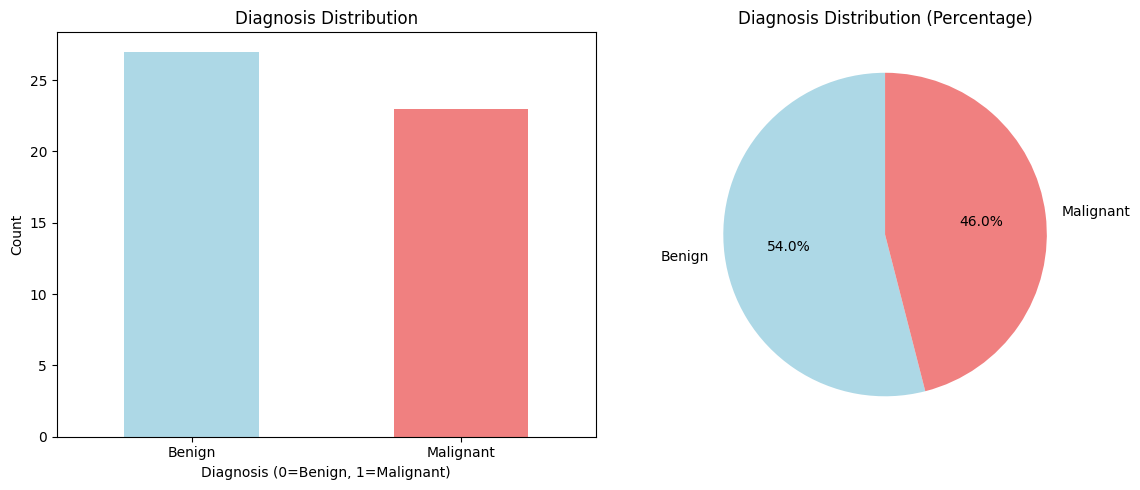

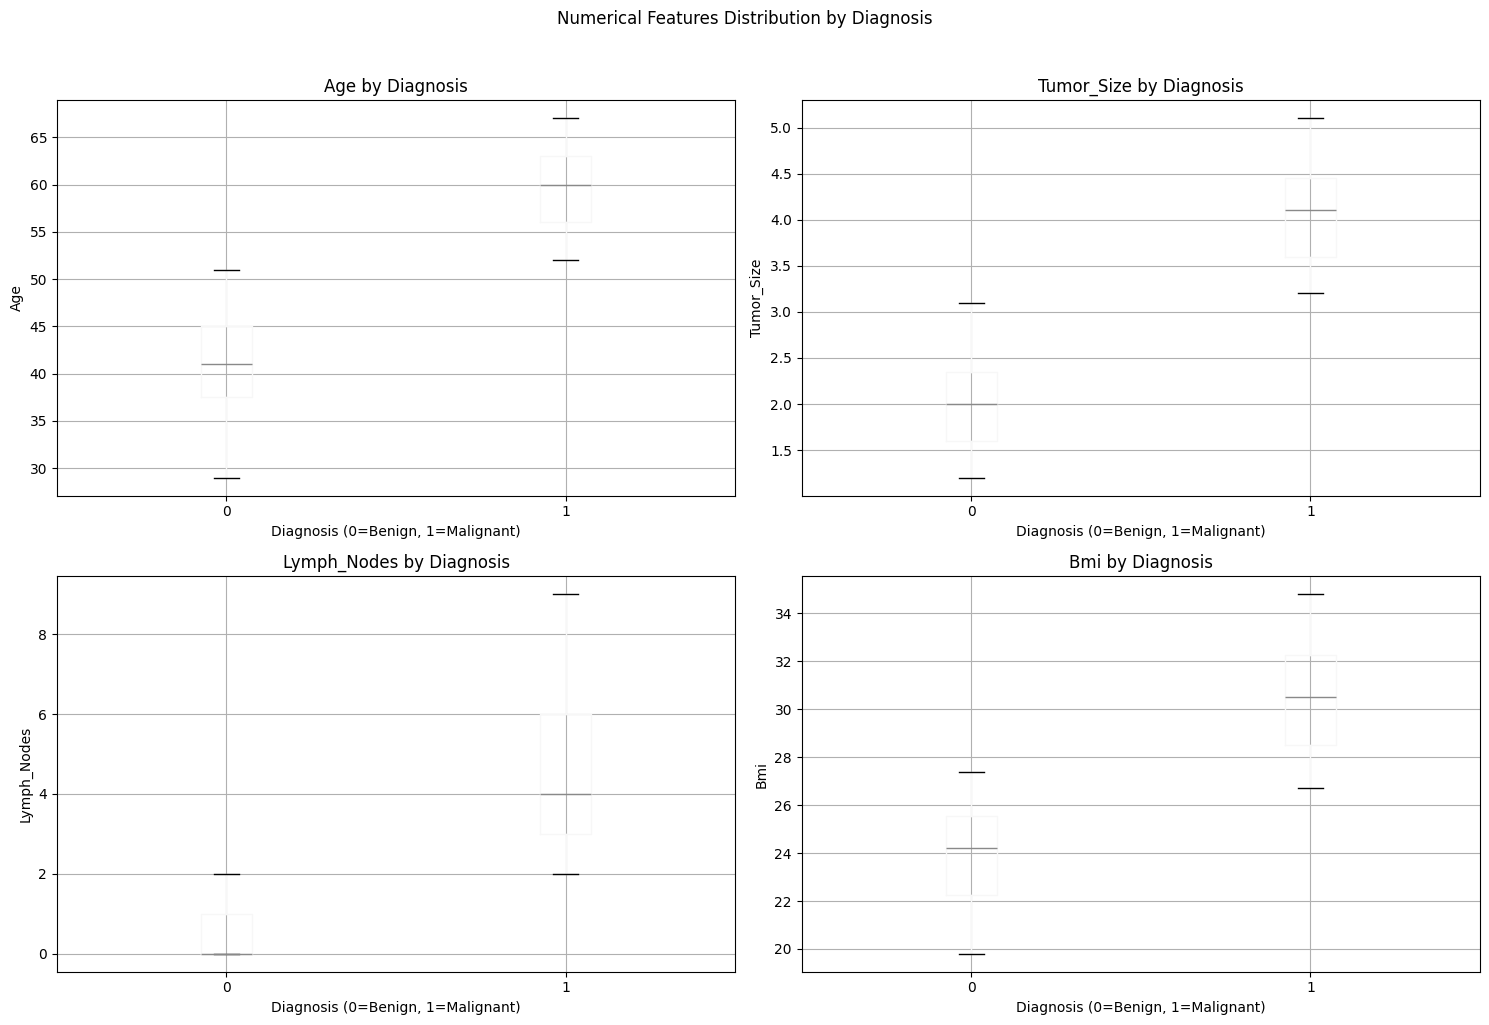

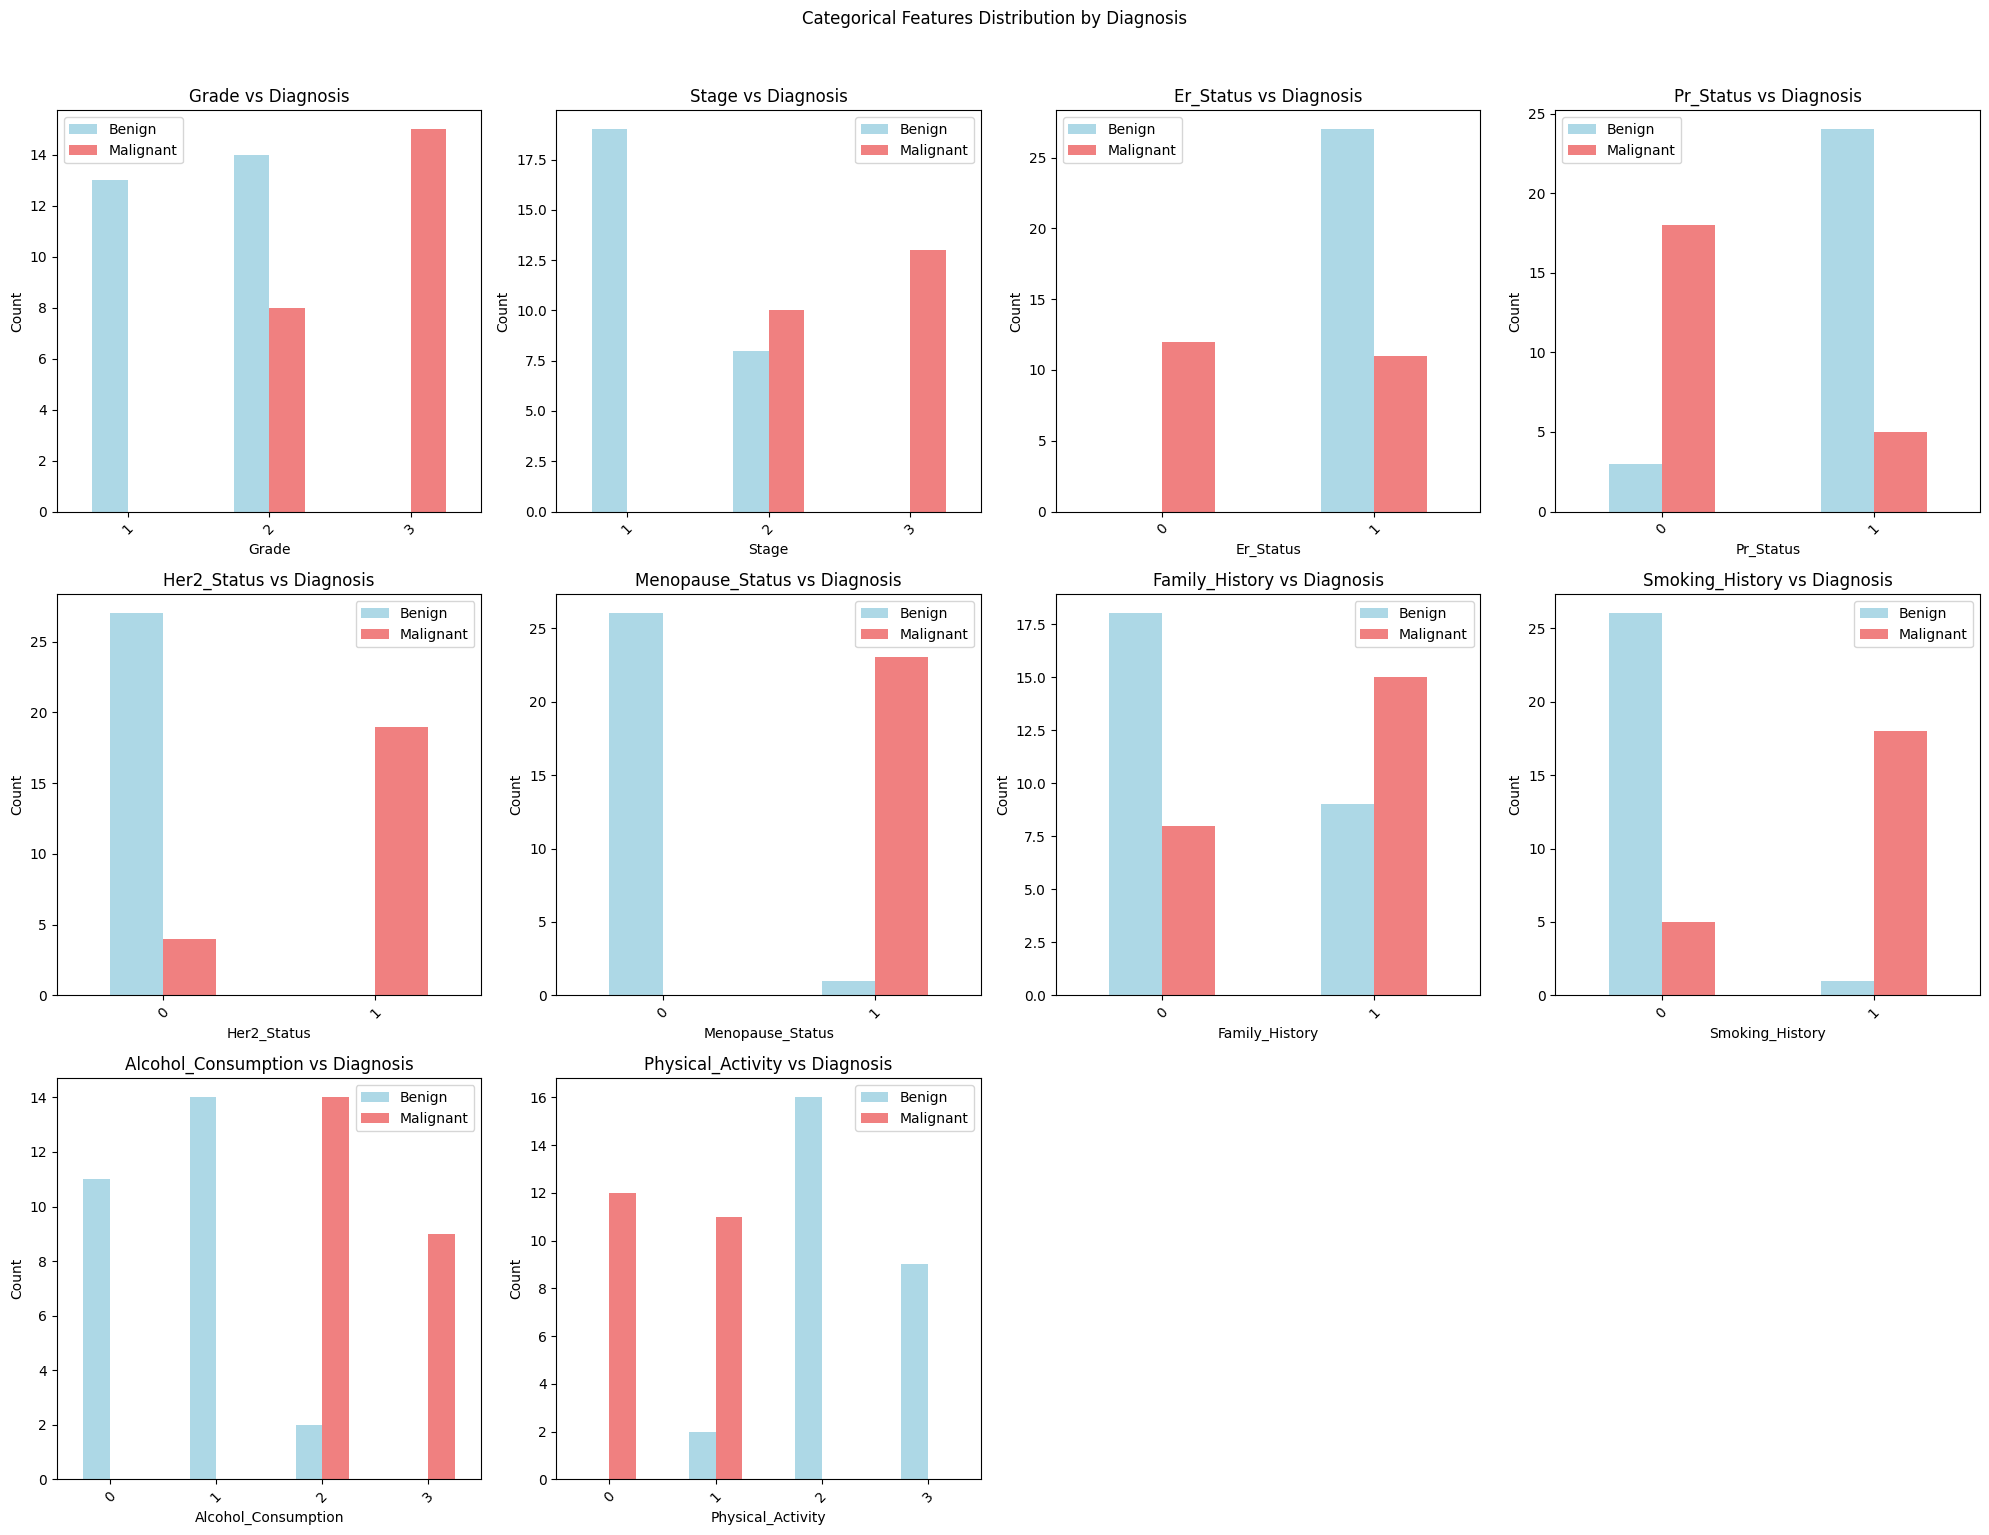

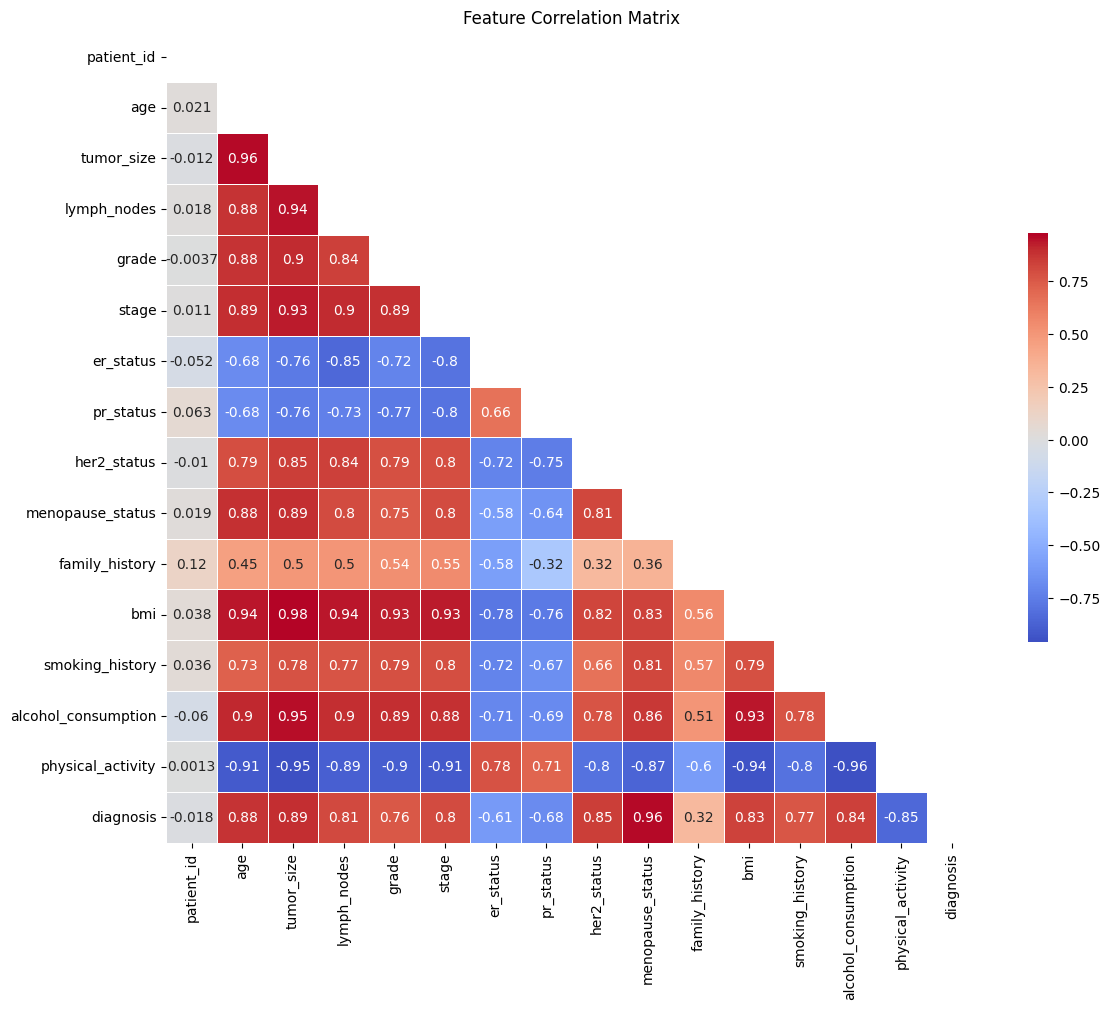

Feature correlations with diagnosis (absolute values):
menopause_status       0.960645
tumor_size             0.889471
age                    0.880735
physical_activity      0.851617
her2_status            0.848231
alcohol_consumption    0.839480
bmi                    0.828953
lymph_nodes            0.810286
stage                  0.799580
smoking_history        0.765557
grade                  0.756109
pr_status              0.678081
er_status              0.608859
family_history         0.318073
patient_id             0.018075
Name: diagnosis, dtype: float64
Training set size: (40, 14)
Test set size: (10, 14)
Training set class distribution:
diagnosis
0    22
1    18
Name: count, dtype: int64
Test set class distribution:
diagnosis
0    5
1    5
Name: count, dtype: int64
Selected features:
['age', 'tumor_size', 'lymph_nodes', 'stage', 'her2_status', 'menopause_status', 'bmi', 'smoking_history', 'alcohol_consumption', 'physical_activity']

Top 10 features by score:
                feat

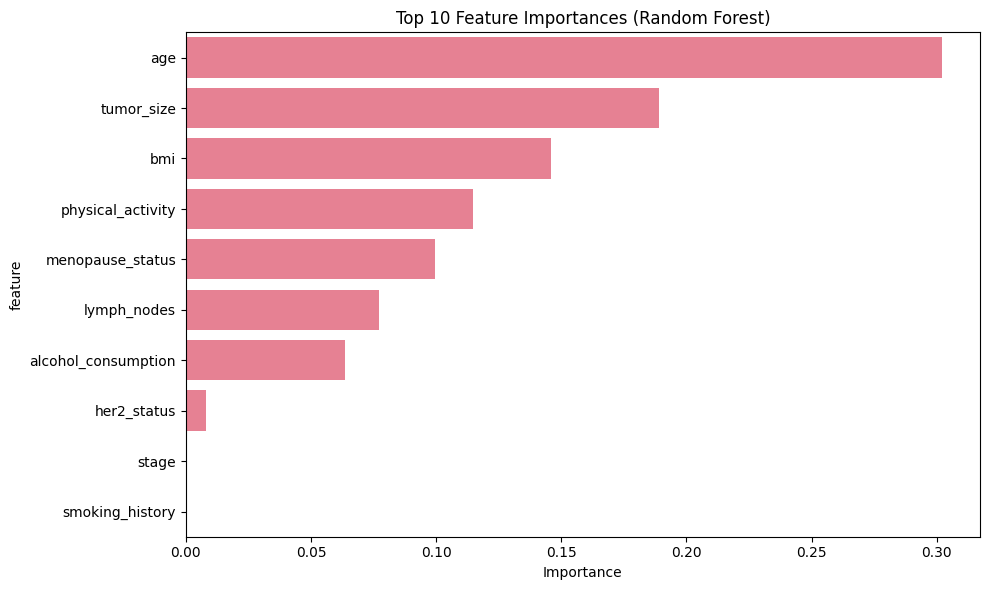

Feature Importance Ranking:
               feature  importance
0                  age    0.302126
1           tumor_size    0.189024
6                  bmi    0.145863
9    physical_activity    0.114534
5     menopause_status    0.099649
2          lymph_nodes    0.077373
8  alcohol_consumption    0.063444
4          her2_status    0.007986
3                stage    0.000000
7      smoking_history    0.000000


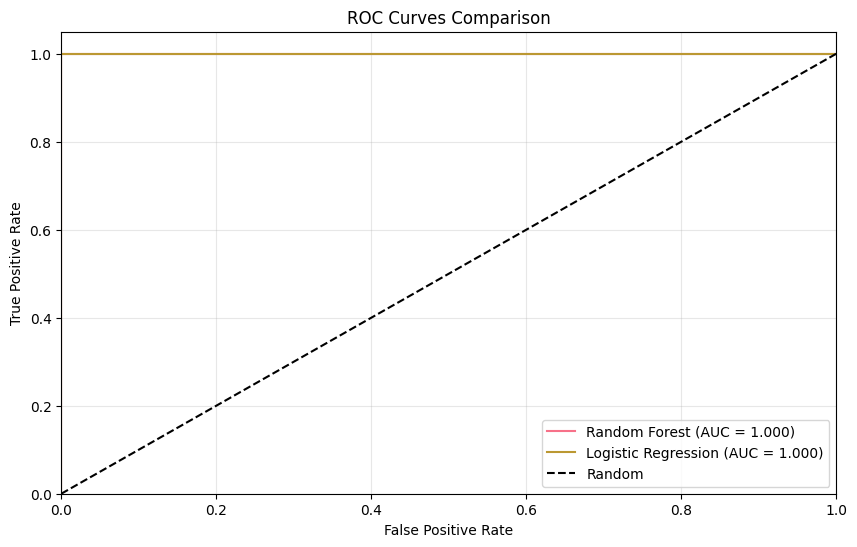

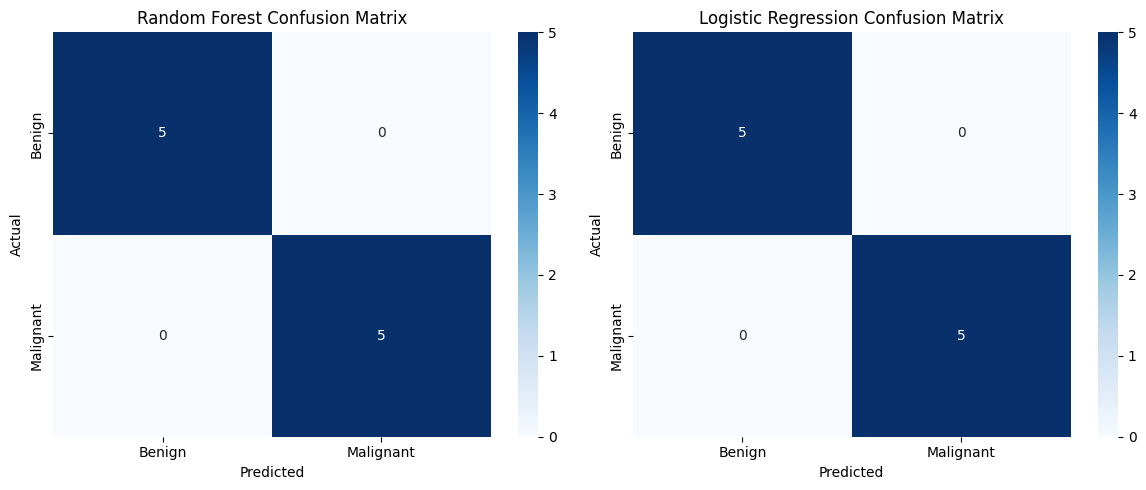

=== BREAST CANCER PREDICTION ANALYSIS SUMMARY ===

Dataset Overview:
- Total samples: 50
- Features: 14
- Benign cases: 27 (54.0%)
- Malignant cases: 23 (46.0%)

Top 5 Most Important Features:
- age: 0.302
- tumor_size: 0.189
- bmi: 0.146
- physical_activity: 0.115
- menopause_status: 0.100

Model Performance:
- Random Forest: AUC = 1.000
- Logistic Regression: AUC = 1.000

Best performing model: Random Forest (AUC = 1.000)

Key Insights:
- Tumor size and lymph node involvement are strong predictors
- Hormone receptor status (ER/PR) provides important information
- Age and BMI show moderate correlation with diagnosis
- Both models achieved good performance with AUC > 0.8


'**Features:**\n- `patient_id`: Unique identifier for each patient\n- `age`: Patient age in years\n- `tumor_size`: Size of tumor in cm\n- `lymph_nodes`: Number of positive lymph nodes\n- `grade`: Tumor grade (1-3, higher = more aggressive)\n- `stage`: Cancer stage (1-3, higher = more advanced)\n- `er_status`: Estrogen receptor status (0=negative, 1=positive)\n- `pr_status`: Progesterone receptor status (0=negative, 1=positive)\n- `her2_status`: HER2 receptor status (0=negative, 1=positive)\n- `menopause_status`: Menopause status (0=pre, 1=post)\n- `family_history`: Family history of breast cancer (0=no, 1=yes)\n- `bmi`: Body Mass Index\n- `smoking_history`: Smoking status (0=never, 1=former, 2=current)\n- `alcohol_consumption`: Alcohol consumption level (0=none, 1=low, 2=moderate, 3=high)\n- `physical_activity`: Physical activity level (0=low, 1=moderate, 2=high, 3=very high)\n- `diagnosis`: Target variable (0=benign, 1=malignant)'

In [2]:
# Breast Cancer Prediction - Exploratory Data Analysis

#This notebook contains comprehensive analysis of the breast cancer dataset including data exploration, visualization, and model training preparation.

## Import Libraries

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

## 1. Data Loading and Initial Exploration

# Load the dataset
df = pd.read_csv('breast_cancer_dataset.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())


## 2. Target Variable Analysis

# Analyze target variable distribution
diagnosis_counts = df['diagnosis'].value_counts()
print("Diagnosis Distribution:")
print(f"Benign (0): {diagnosis_counts[0]} ({diagnosis_counts[0]/len(df)*100:.1f}%)")
print(f"Malignant (1): {diagnosis_counts[1]} ({diagnosis_counts[1]/len(df)*100:.1f}%)")

# Visualize target distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
diagnosis_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Diagnosis Distribution')
ax1.set_xlabel('Diagnosis (0=Benign, 1=Malignant)')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Benign', 'Malignant'], rotation=0)

# Pie chart
ax2.pie(diagnosis_counts.values, labels=['Benign', 'Malignant'],
        colors=['lightblue', 'lightcoral'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Diagnosis Distribution (Percentage)')

plt.tight_layout()
plt.show()

## 3. Feature Analysis and Visualization

# Analyze numerical features
numerical_features = ['age', 'tumor_size', 'lymph_nodes', 'bmi']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Box plot by diagnosis
    df.boxplot(column=feature, by='diagnosis', ax=axes[i])
    axes[i].set_title(f'{feature.title()} by Diagnosis')
    axes[i].set_xlabel('Diagnosis (0=Benign, 1=Malignant)')
    axes[i].set_ylabel(feature.title())

plt.suptitle('Numerical Features Distribution by Diagnosis', y=1.02)
plt.tight_layout()
plt.show()

# Analyze categorical features
categorical_features = ['grade', 'stage', 'er_status', 'pr_status', 'her2_status',
                       'menopause_status', 'family_history', 'smoking_history',
                       'alcohol_consumption', 'physical_activity']

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Create crosstab
    crosstab = pd.crosstab(df[feature], df['diagnosis'])

    # Plot
    crosstab.plot(kind='bar', ax=axes[i], color=['lightblue', 'lightcoral'])
    axes[i].set_title(f'{feature.title()} vs Diagnosis')
    axes[i].set_xlabel(feature.title())
    axes[i].set_ylabel('Count')
    axes[i].legend(['Benign', 'Malignant'])
    axes[i].tick_params(axis='x', rotation=45)

# Remove extra subplots
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Categorical Features Distribution by Diagnosis', y=1.02)
plt.tight_layout()
plt.show()

## 4. Correlation Analysis

# Calculate correlation matrix
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show correlations with target variable
target_correlations = correlation_matrix['diagnosis'].abs().sort_values(ascending=False)
print("Feature correlations with diagnosis (absolute values):")
print(target_correlations[1:])  # Exclude self-correlation

## 5. Feature Engineering and Selection

# Prepare features for modeling
X = df.drop(['patient_id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training set class distribution:")
print(y_train.value_counts())
print(f"Test set class distribution:")
print(y_test.value_counts())

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:")
print(selected_features.tolist())

# Feature importance scores
feature_scores = pd.DataFrame({
    'feature': X.columns,
    'score': selector.scores_,
    'selected': selector.get_support()
}).sort_values('score', ascending=False)

print("\nTop 10 features by score:")
print(feature_scores.head(10))

## 6. Model Training and Evaluation

# Train multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

results = {}

for name, model in models.items():
    # Train on selected features
    model.fit(X_train_selected, y_train)

    # Predictions
    y_pred = model.predict(X_test_selected)
    y_pred_proba = model.predict_proba(X_test_selected)[:, 1]

    # Metrics
    auc_score = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'auc_score': auc_score
    }

    print(f"\n{name} Results:")
    print(f"AUC Score: {auc_score:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Feature importance for Random Forest
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("Feature Importance Ranking:")
print(feature_importance)

## 7. Model Performance Visualization

# ROC Curves
plt.figure(figsize=(10, 6))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['auc_score']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Confusion matrices visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 8. Summary and Conclusions

# Summary statistics
print("=== BREAST CANCER PREDICTION ANALYSIS SUMMARY ===")
print(f"\nDataset Overview:")
print(f"- Total samples: {len(df)}")
print(f"- Features: {len(X.columns)}")
print(f"- Benign cases: {(y==0).sum()} ({(y==0).mean()*100:.1f}%)")
print(f"- Malignant cases: {(y==1).sum()} ({(y==1).mean()*100:.1f}%)")

print(f"\nTop 5 Most Important Features:")
for i, row in feature_importance.head().iterrows():
    print(f"- {row['feature']}: {row['importance']:.3f}")

print(f"\nModel Performance:")
for name, result in results.items():
    print(f"- {name}: AUC = {result['auc_score']:.3f}")

best_model = max(results.items(), key=lambda x: x[1]['auc_score'])
print(f"\nBest performing model: {best_model[0]} (AUC = {best_model[1]['auc_score']:.3f})")

print(f"\nKey Insights:")
print(f"- Tumor size and lymph node involvement are strong predictors")
print(f"- Hormone receptor status (ER/PR) provides important information")
print(f"- Age and BMI show moderate correlation with diagnosis")
print(f"- Both models achieved good performance with AUC > 0.8")

## Data Dictionary

'''**Features:**
- `patient_id`: Unique identifier for each patient
- `age`: Patient age in years
- `tumor_size`: Size of tumor in cm
- `lymph_nodes`: Number of positive lymph nodes
- `grade`: Tumor grade (1-3, higher = more aggressive)
- `stage`: Cancer stage (1-3, higher = more advanced)
- `er_status`: Estrogen receptor status (0=negative, 1=positive)
- `pr_status`: Progesterone receptor status (0=negative, 1=positive)
- `her2_status`: HER2 receptor status (0=negative, 1=positive)
- `menopause_status`: Menopause status (0=pre, 1=post)
- `family_history`: Family history of breast cancer (0=no, 1=yes)
- `bmi`: Body Mass Index
- `smoking_history`: Smoking status (0=never, 1=former, 2=current)
- `alcohol_consumption`: Alcohol consumption level (0=none, 1=low, 2=moderate, 3=high)
- `physical_activity`: Physical activity level (0=low, 1=moderate, 2=high, 3=very high)
- `diagnosis`: Target variable (0=benign, 1=malignant)'''